# Dependencias

In [1]:
import os
import uuid
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from IPython.display import display
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

# Data augmentation

In [3]:
os.chdir('/home/ubuntu/tfm')

In [4]:
base_input_path = './TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export'
base_output_path = './TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export-augmented-check'
dataset = [item for item in open(os.path.join(base_input_path, 'Annotations-export.csv')).readlines()[1:]]
dataset_parsed = defaultdict(list)
for item in dataset:
    item = item.split(',')
    dataset_parsed[item[0]].append((item[1:-1], item[-1].rstrip('\n')))

In [5]:
ia.seed(43)

seq = iaa.Sequential([
    iaa.Multiply((0.5, 1.5)),
    iaa.Affine(
        rotate=(-15,15),
        scale=(0.75, 1.25)
    ),
    iaa.Fliplr(0.5), # horizontally flip 50% of all images
    iaa.Flipud(0.5), # vertically flip 50% of all images
], random_order=True)

images = []
bbss = []

for idx, key in tqdm(enumerate(list(dataset_parsed.keys()))):
    
    im = Image.open(os.path.join(base_input_path, key.replace('\"', '')))
    image = np.array(im)
    im.close()
    images.append(image)
    
    value = dataset_parsed[key]
    
    bbs = BoundingBoxesOnImage([BoundingBox(label=item[1].replace('\"', ''), x1=int(float(item[0][0])), y1=int(float(item[0][1])), x2=int(float(item[0][2])), y2=int(float(item[0][3]))) for item in value], shape=image.shape)
    bbss.append(bbs)

10it [00:02,  3.66it/s]


In [6]:
image_aug, bbs_aug = seq(images=images, bounding_boxes=bbss)

In [7]:
if os.path.exists(base_output_path):
    shutil.rmtree(base_output_path)
os.mkdir(base_output_path)

with open(os.path.join(base_output_path, 'Annotations-export.csv'), 'w') as fd:
    
    fd.write(""""image","xmin","ymin","xmax","ymax","label"\n""")

    images_augmented = []
    
    for i in tqdm(range(len(image_aug))):

        filename_before = str(uuid.uuid4()) + '.jpg'
        filename_after = 'aug_' + filename_before
        
        im = Image.fromarray(images[i])
        im.save(os.path.join(base_output_path, filename_before))
        for before in bbss[i].bounding_boxes:
            
            fd.write(f"\"{filename_before}\",{max(0,int(float(before.x1)))},{max(0,int(float(before.y1)))},{min(images[i].shape[1], int(float(before.x2)))},{min(images[i].shape[0], int(float(before.y2)))},\"{before.label}\"\n")
        
        im = Image.fromarray(image_aug[i])
        im.save(os.path.join(base_output_path, filename_after))
        im = bbs_aug[i].draw_on_image(image_aug[i], size=10, color=[0, 0, 255])
        images_augmented.append(im)
        for after in bbs_aug[i].bounding_boxes:
            fd.write(f"\"{filename_after}\",{max(0,int(float(after.x1)))},{max(0,int(float(after.y1)))},{min(images[i].shape[1], int(float(after.x2)))},{min(images[i].shape[0], int(float(after.y2)))},\"{after.label}\"\n")    

100%|██████████| 10/10 [00:01<00:00,  5.29it/s]


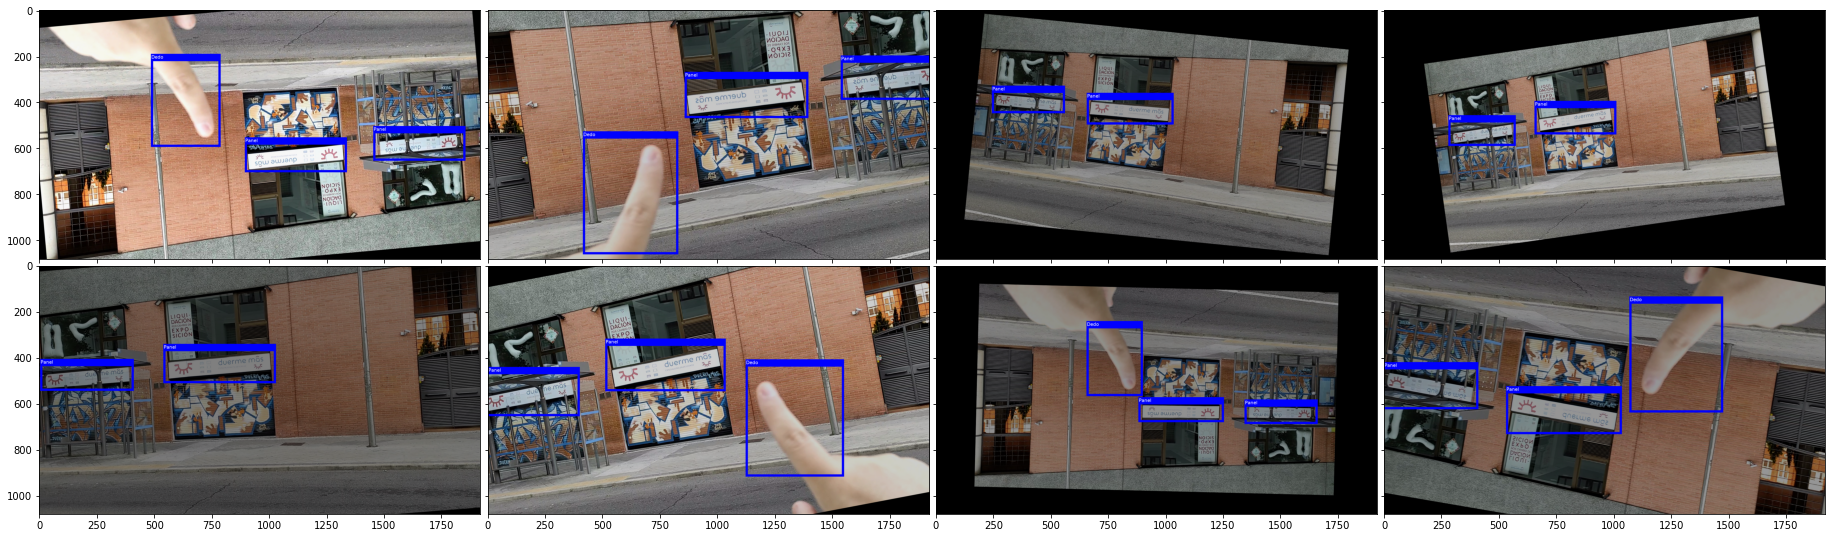

In [8]:
fig = plt.figure(figsize=(32., 32.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x4 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images_augmented[:8]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

# Utilizado para sacar ejemplos

In [16]:
images_augmented = []

In [46]:
seq = iaa.Sequential([
], random_order=True)

In [47]:
base_input_path = './TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export'
base_output_path = './TrainYourOwnYOLO/Data/Source_Images/Training_Images/vott-csv-export-test'
dataset = [item for item in open(os.path.join(base_input_path, 'Annotations-export.csv')).readlines()[532:535]]
dataset_parsed = defaultdict(list)
for item in dataset:
    item = item.split(',')
    dataset_parsed[item[0]].append((item[1:-1], item[-1].rstrip('\n')))
    
ia.seed(43)

images = []
bbss = []

for idx, key in tqdm(enumerate(list(dataset_parsed.keys()))):
    
    im = Image.open(os.path.join(base_input_path, key.replace('\"', '')))
    image = np.array(im)
    im.close()
    images.append(image)
    
    value = dataset_parsed[key]
    
    bbs = BoundingBoxesOnImage([BoundingBox(label=item[1].replace('\"', ''), x1=int(float(item[0][0])), y1=int(float(item[0][1])), x2=int(float(item[0][2])), y2=int(float(item[0][3]))) for item in value], shape=image.shape)
    bbss.append(bbs)
    
image_aug, bbs_aug = seq(images=images, bounding_boxes=bbss)

if os.path.exists(base_output_path):
    shutil.rmtree(base_output_path)
os.mkdir(base_output_path)

with open(os.path.join(base_output_path, 'Annotations-export.csv'), 'w') as fd:
    
    fd.write(""""image","xmin","ymin","xmax","ymax","label"\n""")
    
    for i in tqdm(range(len(image_aug))):

        filename_before = str(uuid.uuid4()) + '.jpg'
        filename_after = 'aug_' + filename_before
        
        im = Image.fromarray(images[i])
        im.save(os.path.join(base_output_path, filename_before))
        for before in bbss[i].bounding_boxes:
            
            fd.write(f"\"{filename_before}\",{max(0,int(float(before.x1)))},{max(0,int(float(before.y1)))},{min(images[i].shape[1], int(float(before.x2)))},{min(images[i].shape[0], int(float(before.y2)))},\"{before.label}\"\n")
        
        im = Image.fromarray(image_aug[i])
        im.save(os.path.join(base_output_path, filename_after))
        im = bbs_aug[i].draw_on_image(image_aug[i], size=10, color=[0, 0, 255])
        images_augmented.append(im)
        for after in bbs_aug[i].bounding_boxes:
            fd.write(f"\"{filename_after}\",{max(0,int(float(after.x1)))},{max(0,int(float(after.y1)))},{min(images[i].shape[1], int(float(after.x2)))},{min(images[i].shape[0], int(float(after.y2)))},\"{after.label}\"\n")    

1it [00:00, 14.13it/s]
100%|██████████| 1/1 [00:00<00:00,  4.84it/s]


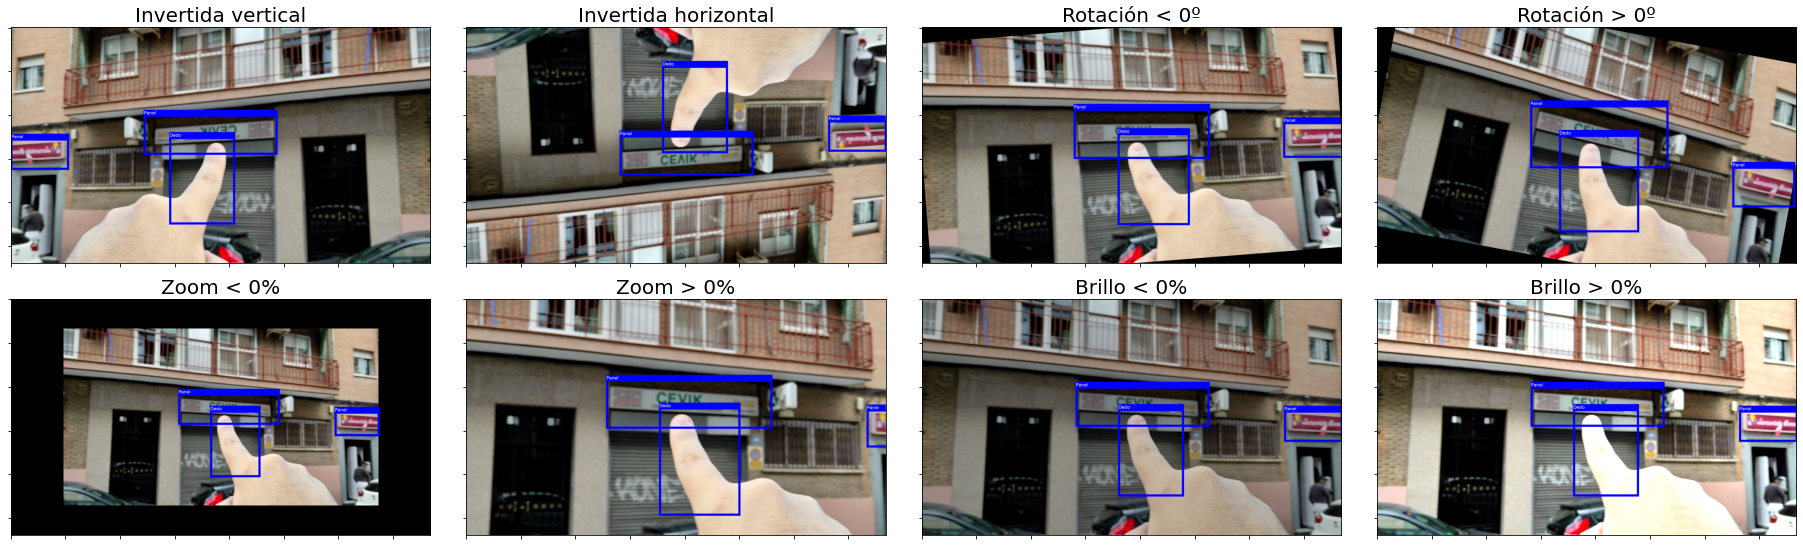

In [63]:
fig = plt.figure(figsize=(32., 32.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x4 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
idx = 0
titles = ["Invertida vertical", "Invertida horizontal", "Rotación < 0º", "Rotación > 0º", "Zoom < 0%", "Zoom > 0%", "Brillo < 0%", "Brillo > 0%"]
for ax, im in zip(grid, images_augmented):
    # Iterating over the grid returns the Axes.
    
    ax.set_title(titles[idx], fontdict={'fontsize': 20})
    idx += 1
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(im)

plt.show()